<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/2-Python/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot
import matplotlib.dates

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/2-Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)
meteo.drop(['Unnamed: 0'], inplace=True, axis=1)


print ( 'dimensione dataset iniziale: ' + str(meteo.shape) )


meteo = meteo.dropna()
meteo.isna().sum().sum()

print ( 'dimensione dataset senza NaN: ' + str(meteo.shape) )

newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)

cols=['Year', 'Month', 'Day']
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
meteo['Date']=pd.to_datetime(meteo['Date'])
meteo.head()

dimensione dataset iniziale: (237629, 13)
dimensione dataset senza NaN: (21799, 13)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,Date
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,2010-01-01
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,2010-01-01
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,2010-01-01
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,2010-01-02
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,2010-01-02


In [ ]:
# Check the overall info
meteo.info()

In [ ]:
# Check the numerical data stats
meteo.describe()

In [ ]:
meteo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(meteo['mean_air_temp_perday'])
plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)

plt.plot(meteo['Date'], meteo['mean_air_temp_perday'])
plt.grid()
plt.show()

In [ ]:
#Segment column
plt.figure(figsize= (8,4))
meteo["sourceID"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the data per weather station\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("sourceID", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

In [4]:
meteo_ = pd.PeriodIndex(meteo['Date'].Index, freq='M').drop_duplicates()
meteo_

AttributeError: ignored

datetime64[ns]


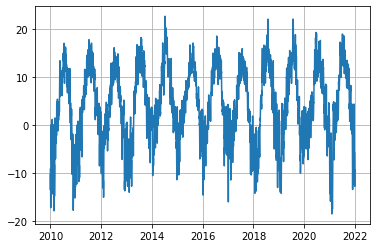

In [47]:
date = meteo['Date']

date = pd.PeriodIndex(date, freq="D").drop_duplicates()


temperatury_mont = []
date_ = []


for y in date:
     
  tmp = meteo[meteo['Date'] == str(y)]
  tmp = tmp['mean_air_temp_perday'].mean()
  temperatury_mont.append(tmp)
  date_.append(y)


#years = pd.PeriodIndex(date_, freq="Y").drop_duplicates()


df_series = pd.DataFrame({'Temperatury' : temperatury_mont , 'Date' : date_})

df_series['Date'] = df_series['Date'].astype(str)
df_series['Date'] = pd.to_datetime(df_series['Date'])
print(df_series['Date'].dtypes)


df_series.head()



plt.plot(df_series['Date'], df_series['Temperatury'])
plt.grid()
plt.show()



datetime64[ns]


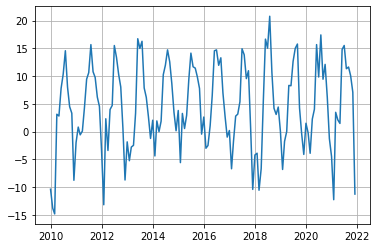

In [38]:
date = meteo['Date']

date = pd.PeriodIndex(date, freq="M").drop_duplicates()

temperatury_mont = []
date_ = []


for y in date:
     
  tmp = meteo[meteo['Date'] == str(y)]
  tmp = tmp['mean_air_temp_perday'].mean()
  temperatury_mont.append(tmp)
  date_.append(y)


#years = pd.PeriodIndex(date_, freq="Y").drop_duplicates()


df_series = pd.DataFrame({'Temperatury' : temperatury_mont , 'Date' : date_})

df_series['Date'] = df_series['Date'].astype(str)
df_series['Date'] = pd.to_datetime(df_series['Date'])
print(df_series['Date'].dtypes)


df_series.head()



plt.plot(df_series['Date'], df_series['Temperatury'])
plt.grid()
plt.show()




In [39]:
from statsmodels.tsa.seasonal import STL


result = STL(df_series).fit()



TypeError: ignored

<ipython-input-71-bc3e17d2a9e9>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_series['Temperatury'], model='additive',freq = 365).plot()


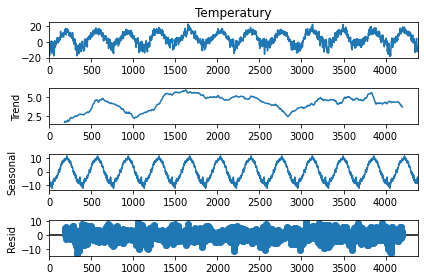

In [71]:

#serie_temporale = pd.Series(df_series['Temperatury'], index=df_series['Date'])


result = seasonal_decompose(df_series['Temperatury'], model='additive',freq = 365).plot() 



In [67]:


# plottiamo la componente di tendenza

trend = result.trend
plt.figure(figsize=(20,8))
plt.plot(trend, label='Trend')
plt.show()

# plottiamo la componente stagionale
plt.figure(figsize=(20,8))
plt.plot(result.seasonal, label='Seasonal')
plt.show()

# plottiamo la componente residua
plt.figure(figsize=(20,8))
plt.plot(result.resid, label='Residual')
plt.show()



AttributeError: ignored

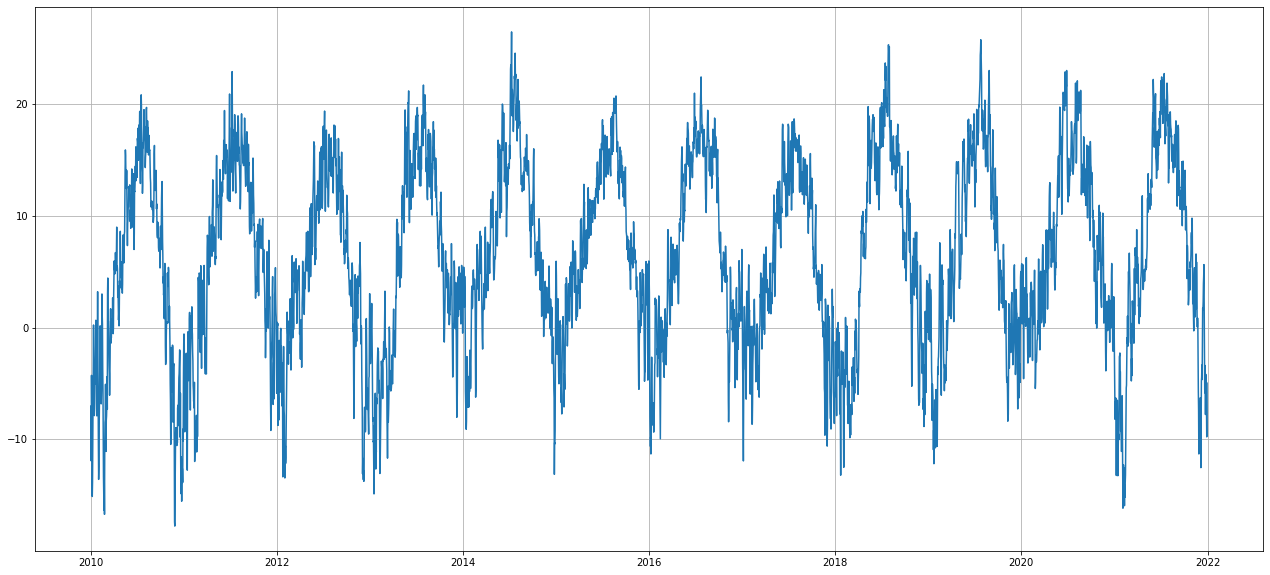

,T_mean,Date
0,-7.025,2010-01-01
1,-11.925,2010-01-02
2,-4.275,2010-01-03
3,-7.250,2010-01-04
4,-15.050,2010-01-05
...,...,...
4377,-5.050,2021-12-26
4378,-4.500,2021-12-27
4379,-6.750,2021-12-28
4380,-9.775,2021-12-29


In [ ]:
day = meteo['Date'].unique()
temperatury = []
date = []

for y in day:

  df_tmp = meteo[meteo['Date'] == y]
                 
  max = df_tmp['max_air_temp_perday'].max()
  min = df_tmp['mean_air_temp_perday'].min()
  mean = (max + min) / 2 

  date.append(y)
  temperatury.append(mean)

meteo_mean_day = pd.DataFrame({'T_mean' : temperatury , 'Date' : date})

f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)

plt.plot(meteo_mean_day['Date'], meteo_mean_day['T_mean'])
plt.grid()
plt.show()

pd.to_datetime(meteo_mean_day['Date']).dt.to_period('m')
meteo_mean_day

Decomposizione additiva

In [ ]:
month = meteo['']

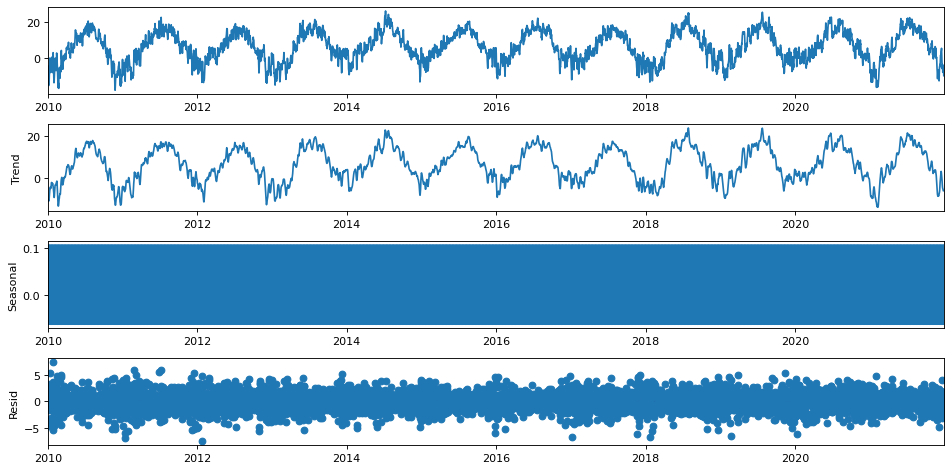

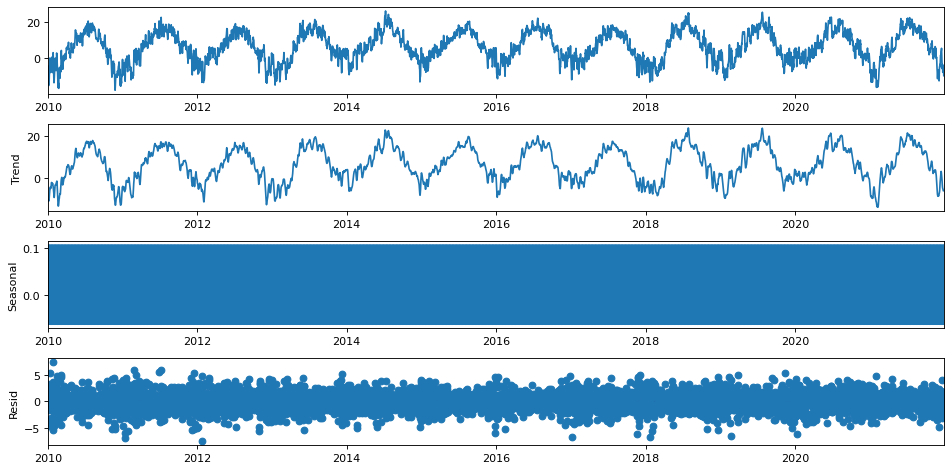

In [ ]:
data = []
for x in meteo_mean_day['T_mean']:
  data.append(x)
  
index = []
for x in meteo_mean_day['Date']:
  index.append(x)

serie_temporale = pd.Series(data, index=index)


#crimesPerMonth_ts.index = crimesPerMonth_ts.index.to_timestamp() # todo once: seasonal_decompose does not accept PeriodIndex
add_decomposition = seasonal_decompose(serie_temporale, model='additive') #dal grafico sopra si evince che è additiva
add_decomposition.plot()
#plt.title("additive decomposition")
plt.grid(b=True, which='major', axis='x')
plt.xticks(data,data)
plt.xlabel('')

print(index)

In [ ]:
data = []
for x in  meteo['mean_air_temp_perday']:
  data.append(x)
  
index = []
for x in meteo['Date']:
  index.append(x)


print(len(data))
print(len(index))

print(index)
serie_temporale = pd.Series(data, index=index)


#crimesPerMonth_ts.index = crimesPerMonth_ts.index.to_timestamp() # todo once: seasonal_decompose does not accept PeriodIndex
add_decomposition = seasonal_decompose(serie_temporale, model='multiplicative') #dal grafico sopra si evince che è additiva
add_decomposition.plot()

21799
21799
[Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-03 00:00:00'), Timestamp('2010-01-03 00:00:00'), Timestamp('2010-01-03 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-05 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-09 00:00:00'), Timestamp('2010-01-09 00:00:00'), Timestamp('2010-01-09 00:00:00'), Timestamp('2010-01-10 00:00:00'), Timestamp('2010-01-10 00:00:00'), T

ValueError: ignored

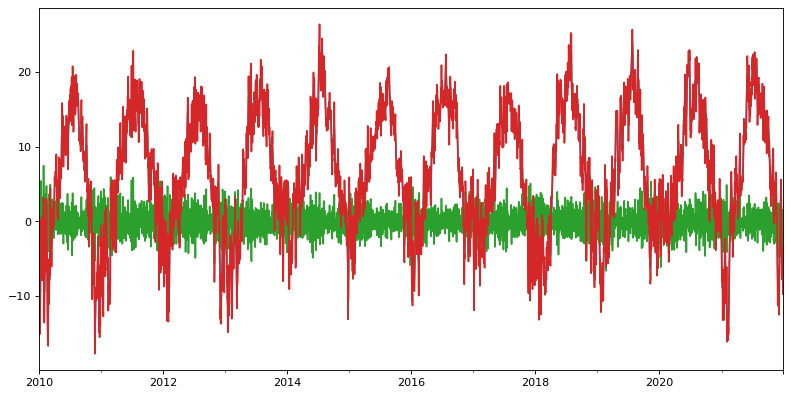

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Creiamo una serie temporale di esempio

data = []
for x in meteo_mean_day['T_mean']:
  data.append(x)
  
index = []
for x in meteo_mean_day['Date']:
  index.append(x)

serie_temporale = pd.Series(data, index=index)

# Decomporre la serie temporale in componenti
result = seasonal_decompose(serie_temporale)

# Visualizzare le componenti
result.trend.plot()
result.seasonal.plot()
result.resid.plot()
result.observed.plot()


In [ ]:
meteo_mean_month = meteo_mean_day

meteo_mean_month['Date'].to_datetime()

meteo_mean_month['Date'] = pd.to_datetime(meteo_mean_month['Date']).dt.to_period('m') # Converting the Order Date to month-Year format

meteo_mean_month.head()


month = meteo['Date'].unique()
temperatury = []
date = []

for y in month:

  df_tmp = meteo[meteo['Date'] == y]
                 
  max = df_tmp['max_air_temp_perday'].max()
  min = df_tmp['mean_air_temp_perday'].min()
  mean = (max + min) / 2 

  date.append(y)
  temperatury.append(mean)

meteo_mean_month = pd.DataFrame({'T_mean' : temperatury , 'Date' : date})

f = plt.figure()
f.set_figwidth(22)
f.set_figheight(10)

plt.plot(meteo_mean_day['Date'], meteo_mean_day['T_mean'])
plt.grid()
plt.show()




AttributeError: ignored